In [1]:
#Code written by Navami
import pickle
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import torch


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#load in the labels
import pandas as pd
labels = pd.read_csv('/content/drive/MyDrive/EVO/rif_embeddings_v1/12259_rif_labels.csv')

In [7]:
#subselect from labels
labels_subselect = labels[~labels['UNIQUEID'].str.contains('site.02', na=False)]

In [8]:
labels_subselect['phenotype'] = labels['RIF_BINARY_PHENOTYPE'].replace({'S': 1, 'R': 0})

<ipython-input-8-273df59661be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels_subselect['phenotype'] = labels['RIF_BINARY_PHENOTYPE'].replace({'S': 1, 'R': 0})


In [9]:
labels_subselect

,Unnamed: 0,UNIQUEID,RIF_BINARY_PHENOTYPE,phenotype
1074,1074,site.03.subj.10120.lab.IML-01041.iso.1,R,0.0
1075,1075,site.03.subj.10121.lab.IML-01043.iso.1,S,1.0
1076,1076,site.03.subj.10134.lab.IML-01040.iso.1,S,1.0
1077,1077,site.03.subj.10136.lab.IML-01042.iso.1,S,1.0
1078,1078,site.03.subj.10148.lab.IML-01033.iso.1,S,1.0
...,...,...,...,...
12254,12282,site.20.subj.SCH8604398.lab.YA00134621.iso.1,S,1.0
12255,12283,site.20.subj.SCH8604399.lab.YA00134971.iso.1,S,1.0
12256,12284,site.20.subj.SCH8608291.lab.YA00135762.iso.1,R,0.0
12257,12285,site.20.subj.SCH8608295.lab.YA00134623.iso.1,S,1.0


In [10]:
y = np.array(labels_subselect['phenotype'])

In [11]:
def load_and_concatenate_npy_files(npy_files):
    arrays = np.load(npy_files, allow_pickle=True)
    #print(arrays)
    if arrays.size == 0 or arrays.size == 1:
      return None
    concatenated_array = np.squeeze(arrays)
    #print(concatenated_array.shape)
    return concatenated_array[-1,:]

In [12]:
import os
import fnmatch
import numpy as np

def find_npy_files(base_dir, pattern):
    npy_files = []
    for root, _, files in os.walk(base_dir):
        for file in files:
            if fnmatch.fnmatch(file, pattern):
                npy_files.append(os.path.join(root, file))
    #print(npy_files)
    return npy_files[0]



# Example usage
files_list = labels['UNIQUEID'].tolist()

In [ ]:
#np.load('/content/drive/MyDrive/BioE212/EVO/rif_embeddings_v1/embeds_1.0_singles/site_02/site.02.subj.1120.lab.2014185039.iso.1.npy')

In [ ]:
'''
import csv
npy_files = []
with open("/content/drive/MyDrive/npy_files_final2.csv", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(npy_files)
'''

In [ ]:
#np.load('/content/drive/MyDrive/BioE212/EVO/rif_embeddings_v1/embeds_1.0_singles/site_02/site.02.subj.0001.lab.2014222001.iso.1.npy')

array([[ 0.2265625 ,  0.14355469,  0.02075195, ..., -0.16699219,
         0.18261719, -0.25195312],
       [ 0.2109375 ,  0.12109375,  0.00114441, ..., -0.17089844,
         0.14746094, -0.25195312],
       [ 0.17773438,  0.0859375 ,  0.06225586, ..., -0.11279297,
         0.16796875, -0.20117188],
       ...,
       [ 0.07910156, -0.00164032,  0.828125  , ...,  0.55859375,
         0.13671875,  0.5       ],
       [ 0.35546875,  0.24902344, -0.66796875, ..., -0.78515625,
         0.34765625, -0.84765625],
       [ 0.828125  ,  0.65234375, -0.66796875, ..., -1.046875  ,
        -0.47070312, -1.0234375 ]])

In [13]:
import csv

# Define the path to the CSV file
file_path = '/content/drive/MyDrive/npy_files_final.csv'

# Initialize an empty list to hold the CSV data
csv_data = []

# Open and read the CSV file
with open(file_path, newline='') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        # Append the entire row (which is a list of values) to csv_data
        csv_data.extend(row)

# Print the CSV data as a single list
#print(csv_data)


In [ ]:
site02csv = csv_data[1074:]

In [ ]:
len(site02csv)

1074

In [ ]:
import tensorflow as tf
'''
# Define a function to load and concatenate arrays in batches
def load_and_concatenate_batches(npy_files, batch_size):
    concatenated_batches = []
    for start_index in range(0, len(npy_files), batch_size):
        batch_files = npy_files[start_index:start_index+batch_size]
        #batch = tf.concat([load_and_concatenate_npy_files(npy_file) for npy_file in batch_files], axis=0)
        batch_list = []
        for npy_file in batch_files:
          #print(npy_file)
          array = load_and_concatenate_npy_files(npy_file)
          #print(array.shape)
          if array is not None:
            batch_list.append(np.squeeze(array))
          else:
            print(npy_file)
        batch = np.stack(batch_list, axis=0)
        batch = np.squeeze(batch)
        np.save(str('/content/drive/MyDrive/rif_embeddings_0526' + str(start_index) + "_arrayfinal3.npy"), batch)
        concatenated_batches.append(batch)
        print(start_index)
    concat_batch = np.vstack(concatenated_batches)
    #concat_array = concat_batch.numpy()

    return concat_batch

# Load and concatenate arrays in batches
batch_size = 100  # Adjust batch size based on available GPU memory
concatenated_array = load_and_concatenate_batches(csv_data, batch_size)
'''

'\n# Define a function to load and concatenate arrays in batches\ndef load_and_concatenate_batches(npy_files, batch_size):\n    concatenated_batches = []\n    for start_index in range(0, len(npy_files), batch_size):\n        batch_files = npy_files[start_index:start_index+batch_size]\n        #batch = tf.concat([load_and_concatenate_npy_files(npy_file) for npy_file in batch_files], axis=0)\n        batch_list = []\n        for npy_file in batch_files:\n          #print(npy_file)\n          array = load_and_concatenate_npy_files(npy_file)\n          #print(array.shape)\n          if array is not None:\n            batch_list.append(np.squeeze(array))\n          else:\n            print(npy_file)\n        batch = np.stack(batch_list, axis=0)\n        batch = np.squeeze(batch)\n        np.save(str(\'/content/drive/MyDrive/rif_embeddings_0526\' + str(start_index) + "_arrayfinal3.npy"), batch)\n        concatenated_batches.append(batch)\n        print(start_index)\n    concat_batch = np.vst

In [ ]:
def load_and_concatenate_batches(batch_size, npy_files):
    concatenated_batches = []
    for start_index in range(0, len(npy_files), batch_size):

        batch = np.load(str('/content/drive/MyDrive/rif_embeddings_0526' + str(start_index) + "_arrayfinal3.npy"))
        concatenated_batches.append(batch)
        print(start_index)

    return np.vstack(concatenated_batches)

batch_size = 100  # Adjust batch size based on available GPU memory
concatenated_array = load_and_concatenate_batches(batch_size, csv_data)

In [15]:
site02concatarray = concatenated_array[1074:,:]

In [16]:
nan_indices = np.isnan(y)

In [17]:
y = y[~nan_indices]
site02concatarray = site02concatarray[~nan_indices]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(site02concatarray, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import torch

In [20]:
# Train a logistic regression model
clf = LogisticRegression(multi_class='ovr')

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Print a few predictions vs actual labels
for i in range(10):
    print(f'Predicted: {y_pred[i]}, Actual: {y_test[i]}')

Accuracy: 0.7075386012715713
Predicted: 1.0, Actual: 1.0
Predicted: 0.0, Actual: 0.0
Predicted: 0.0, Actual: 0.0
Predicted: 1.0, Actual: 1.0
Predicted: 1.0, Actual: 0.0
Predicted: 0.0, Actual: 0.0
Predicted: 1.0, Actual: 1.0
Predicted: 0.0, Actual: 0.0
Predicted: 0.0, Actual: 1.0
Predicted: 0.0, Actual: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Calculate sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f'Confusion Matrix:\n{cm}')
print(f'Sensitivity (Recall): {sensitivity}')
print(f'Specificity: {specificity}')

Confusion Matrix:
[[ 528  328]
 [ 316 1030]]
Sensitivity (Recall): 0.7652303120356612
Specificity: 0.616822429906542


In [22]:
#PCA

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

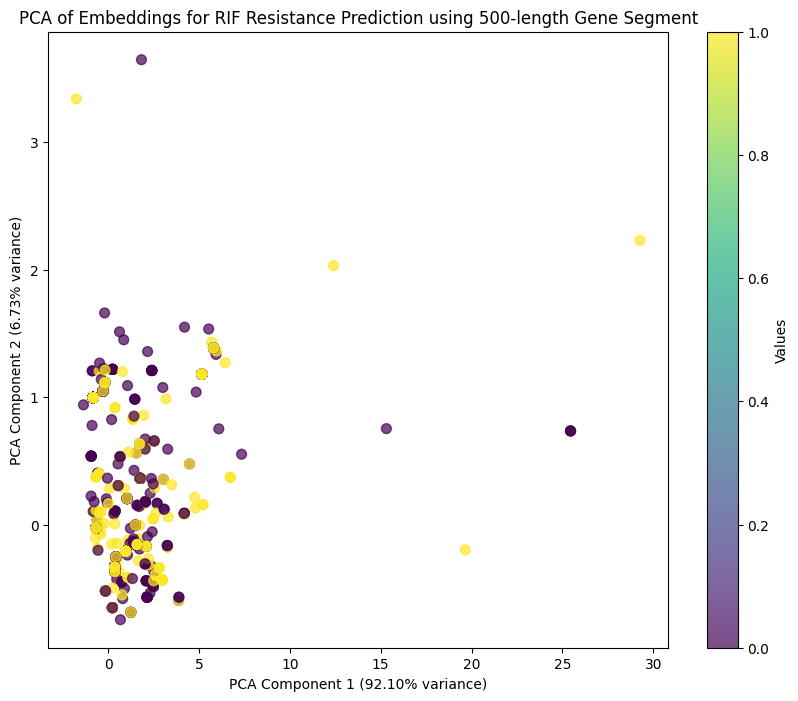

In [23]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(site02concatarray)

# Calculate the percent variation accounted for by each component
explained_variance = pca.explained_variance_ratio_ * 100

# Plot the PCA results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=y, cmap='viridis', s=50, alpha=0.7)

# Adding a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Values')

plt.xlabel(f'PCA Component 1 ({explained_variance[0]:.2f}% variance)')
plt.ylabel(f'PCA Component 2 ({explained_variance[1]:.2f}% variance)')
plt.title('PCA of Embeddings for RIF Resistance Prediction using 500-length Gene Segment')
plt.show()

In [24]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 5.6 MB/s eta 0:00:00


In [25]:
import shap
sample_size = 20
shap_train = shap.sample(X_train, sample_size)
shap_test = shap.sample(X_test, sample_size)
explainer = shap.Explainer(clf, shap_train)
shap_values = explainer(shap_test)

In [26]:
result = {
        'model': clf,
        'X_test': X_test,
        'y_test': y_test,
        "explainer": explainer,
        'shap_values': shap_values,
        'shap_test': shap_test
     }
kernel = result

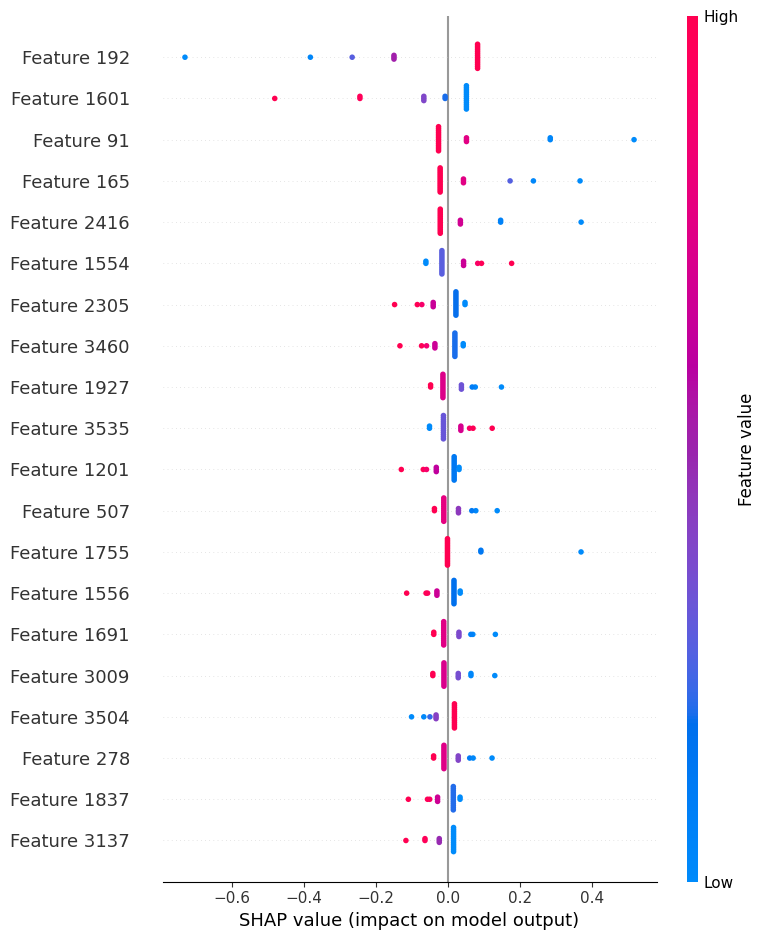

In [28]:
shap.summary_plot(shap_values, shap_test)


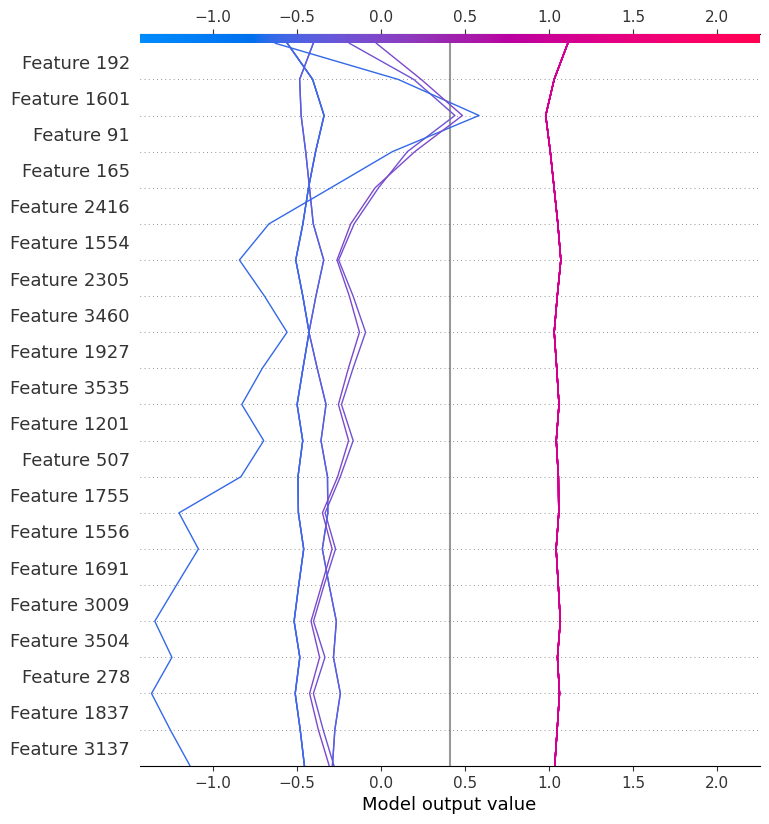

In [27]:
shap.decision_plot(explainer.expected_value, shap_values.values[:30])